# Análise Exploratória

#### Alunos: Ellen Shen, Enzo Neto, Gabriel Huerta, Giulia Castro

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
top_2017_2018 = pd.read_excel("top_2017_2018.xlsx", index_col=1)

In [3]:
top_2017_2018.head(3)

,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,,
2002,2BgEsaKNfHUdlh97KmvFy,Anne-Marie,697.0,683.0,1.0,-2881.0,0.0,117.0000,0.0372,0.0,137.0000,603.0,96133.0,186987.0,4.0
1-800-273-8255,5tz69p7tJuGPeMGwNTxYu,Logic,629.0,572.0,5.0,-7733.0,0.0,0.0387,0.5700,0.0,192.0000,386.0,100015.0,250173.0,4.0
"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",4QtiVmuA88tPQiCOHZuQ5,Sofia Reyes,792.0,895.0,1.0,-3112.0,0.0,0.0589,165.0000,0.0,0.0501,794.0,94968.0,201526.0,4.0


<IPython.core.display.Javascript object>


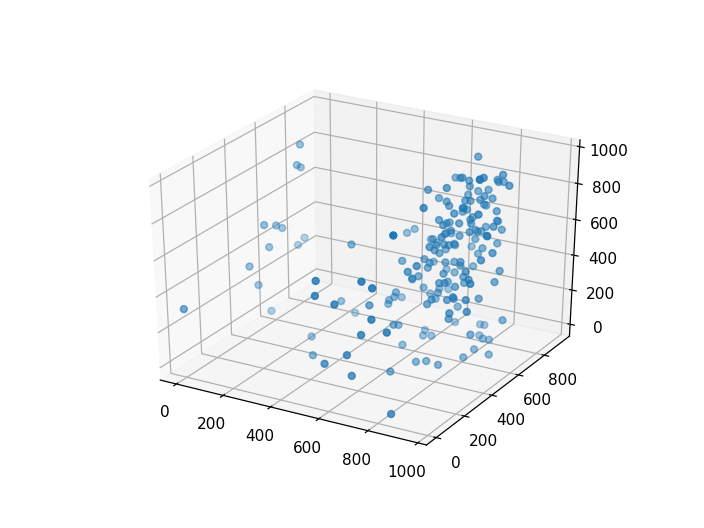

In [4]:
plt3d_2017_2018 = plt.figure().gca(projection="3d")
plt3d_2017_2018.scatter(top_2017_2018.danceability, top_2017_2018.energy, top_2017_2018.valence)

In [5]:
dados_entrada_2017_2018 = top_2017_2018.loc[:,("danceability", "energy", "valence")]

In [6]:
three_means_2017_2018 = cluster.MiniBatchKMeans(n_clusters=8)
three_means_2017_2018.fit(dados_entrada_2017_2018)
saida_2017_2018 = three_means_2017_2018.predict(dados_entrada_2017_2018)
saida_2017_2018

array([7, 2, 1, 7, 5, 7, 4, 7, 1, 7, 0, 6, 2, 4, 5, 1, 3, 7, 2, 3, 1, 4,
       3, 4, 4, 6, 1, 7, 7, 7, 7, 1, 1, 1, 1, 3, 2, 4, 7, 7, 1, 6, 6, 1,
       1, 1, 5, 2, 1, 1, 2, 1, 1, 4, 1, 5, 7, 2, 1, 2, 4, 4, 2, 0, 1, 2,
       0, 4, 4, 0, 0, 4, 7, 0, 2, 0, 1, 0, 7, 0, 6, 3, 7, 0, 3, 1, 2, 4,
       1, 4, 7, 2, 7, 5, 4, 6, 4, 4, 7, 2, 1, 7, 7, 4, 3, 7, 7, 4, 0, 7,
       1, 5, 7, 4, 2, 2, 2, 7, 1, 4, 2, 0, 2, 0, 0, 1, 7, 2, 2, 0, 4, 3,
       7, 7, 3, 0, 0, 7, 3, 4, 6, 1, 1, 5, 7, 4, 3, 0, 7, 1, 7, 0, 4, 1,
       7, 7, 7, 7, 2, 7, 1, 7, 7, 2, 2, 6, 7, 0, 5, 0, 4, 4, 2, 1, 7, 2,
       7, 2, 7, 3, 1, 5, 2, 7, 2, 4, 1], dtype=int32)

In [7]:
conjunto_2017_2018 = dados_entrada_2017_2018.copy()
conjunto_2017_2018["saida"] = saida_2017_2018
conjunto_2017_2018.head()

,danceability,energy,valence,saida
name,,,,
2002,697.0,683.00,603.0,7
1-800-273-8255,629.0,572.00,386.0,2
"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",792.0,895.00,794.0,1
24K Magic,818.0,803.00,632.0,7
2U (feat. Justin Bieber),548.0,0.65,557.0,5


<IPython.core.display.Javascript object>


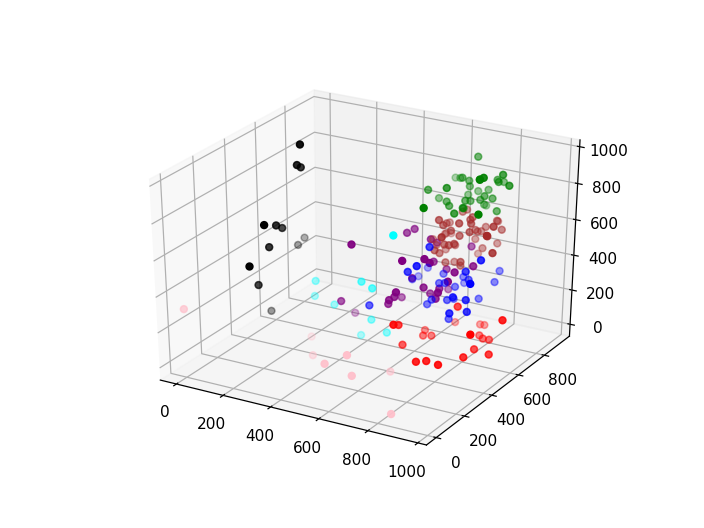

In [8]:
plt3d_2017_2018 = plt.figure().gca(projection="3d")
grupo0_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==0]
grupo1_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==1]
grupo2_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==2]
grupo3_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==3]
grupo4_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==4]
grupo5_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==5]
grupo6_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==6]
grupo7_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==7]

plt3d_2017_2018.scatter(grupo0_2017_2018.danceability, grupo0_2017_2018.energy, grupo0_2017_2018.valence, color="r")
plt3d_2017_2018.scatter(grupo1_2017_2018.danceability, grupo1_2017_2018.energy, grupo1_2017_2018.valence, color="g")
plt3d_2017_2018.scatter(grupo2_2017_2018.danceability, grupo2_2017_2018.energy, grupo2_2017_2018.valence, color="b")
plt3d_2017_2018.scatter(grupo3_2017_2018.danceability, grupo3_2017_2018.energy, grupo3_2017_2018.valence, color="black")
plt3d_2017_2018.scatter(grupo4_2017_2018.danceability, grupo4_2017_2018.energy, grupo4_2017_2018.valence, color="purple")
plt3d_2017_2018.scatter(grupo5_2017_2018.danceability, grupo5_2017_2018.energy, grupo5_2017_2018.valence, color="cyan")
plt3d_2017_2018.scatter(grupo6_2017_2018.danceability, grupo6_2017_2018.energy, grupo6_2017_2018.valence, color="pink")
plt3d_2017_2018.scatter(grupo7_2017_2018.danceability, grupo7_2017_2018.energy, grupo7_2017_2018.valence, color="brown")


In [9]:
grupo0_2017_2018

,danceability,energy,valence,saida
name,,,,
Bad and Boujee (feat. Lil Uzi Vert),927.0,665.0,175.0000,0
goosebumps,841.0,728.0,0.4300,0
Hear Me Now,789.0,442.0,0.4500,0
HUMBLE.,904.0,611.0,0.4000,0
I Don’t Wanna Live Forever,735.0,451.0,0.0862,0
I Like It,816.0,726.0,0.6500,0
I Miss You (feat. Julia Michaels),638.0,658.0,0.3300,0
IDGAF,836.0,544.0,0.5100,0
In My Feelings,835.0,626.0,0.3500,0


In [10]:
grupo1_2017_2018

,danceability,energy,valence,saida
name,,,,
"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",792.0,895.0,794.0,1
Attention,774.0,626.0,777.0,1
Bella,909.0,493.0,844.0,1
Call On Me - Ryan Riback Extended Remix,676.0,843.0,718.0,1
Chantaje,852.0,773.0,907.0,1
Corazon (feat. Nego do Borel),722.0,738.0,748.0,1
Criminal,814.0,813.0,839.0,1
D?jala que vuelva (feat. Manuel Turizo),681.0,788.0,839.0,1
Despacito - Remix,694.0,815.0,813.0,1


In [11]:
grupo2_2017_2018

,danceability,energy,valence,saida
name,,,,
1-800-273-8255,629.0,572.0,386.0,2
Bank Account,884.0,346.0,376.0,2
Body Like A Back Road,731.0,469.0,631.0,2
DNA.,637.0,514.0,402.0,2
Fake Love,927.0,488.0,605.0,2
FEFE (feat. Nicki Minaj & Murda Beatz),931.0,387.0,376.0,2
Fuck Love (feat. Trippie Redd),797.0,533.0,329.0,2
Girls Like You (feat. Cardi B),851.0,541.0,448.0,2
God's Plan,754.0,449.0,357.0,2


In [12]:
grupo3_2017_2018

,danceability,energy,valence,saida
name,,,,
Better Now,0.68,563.0,374.00,3
Bounce Back,0.77,567.0,0.26,3
Candy Paint,0.67,654.0,438.00,3
Despacito (Featuring Daddy Yankee),0.66,786.0,846.00,3
In the Name of Love,0.49,485.0,196.00,3
It Ain't Me (with Selena Gomez),0.64,533.0,515.00,3
Mine,0.71,789.0,717.00,3
Ric Flair Drip (& Metro Boomin),0.88,428.0,333.00,3
Rockabye (feat. Sean Paul & Anne-Marie),0.72,763.0,742.00,3


In [13]:
grupo4_2017_2018

,danceability,energy,valence,saida
name,,,,
All Night,544.0,809.0,448.0,4
Be Alright,553.0,586.0,443.0,4
Call Out My Name,489.0,598.0,172.0,4
Castle on the Hill,461.0,834.0,471.0,4
Chained To The Rhythm,448.0,801.0,462.0,4
Don't Let Me Down,542.0,859.0,403.0,4
Flames,631.0,649.0,421.0,4
Glorious (feat. Skylar Grey),731.0,794.0,356.0,4
God is a woman,602.0,658.0,268.0,4


In [14]:
grupo5_2017_2018

,danceability,energy,valence,saida
name,,,,
2U (feat. Justin Bieber),548.0,0.65,557.0,5
Believer,776.0,0.78,666.0,5
Everybody Dies In Their Nightmares,734.0,0.57,689.0,5
FRIENDS,626.0,0.88,534.0,5
Look What You Made Me Do,773.0,0.68,497.0,5
No Brainer,552.0,0.76,639.0,5
SICKO MODE,834.0,0.73,446.0,5
There's Nothing Holdin' Me Back,857.0,0.80,966.0,5
XO TOUR Llif3,732.0,0.75,401.0,5


In [15]:
grupo6_2017_2018

,danceability,energy,valence,saida
name,,,,
Bad Things (with Camila Cabello),675.00,0.69,272.0000,6
changes,669.00,308.00,0.5200,6
Dusk Till Dawn - Radio Edit,258.00,437.00,0.0967,6
Eastside (with Halsey & Khalid),0.56,0.68,319.0000,6
In My Mind,694.00,0.77,163.0000,6
lovely (with Khalid),351.00,296.00,0.1200,6
Scared to Be Lonely,584.00,0.54,195.0000,6
That's What I Like,853.00,0.56,0.8600,6


In [16]:
grupo7_2017_2018

,danceability,energy,valence,saida
name,,,,
2002,697.0,683.0,603.0,7
24K Magic,818.0,803.0,632.0,7
Ahora Dice,708.0,693.0,427.0,7
All The Stars (with SZA),698.0,633.0,552.0,7
Back To You,601.0,724.0,508.0,7
Body (feat. brando),752.0,764.0,582.0,7
Closer,748.0,524.0,661.0,7
Cold (feat. Future),697.0,716.0,506.0,7
Cold Water (feat. Justin Bieber & MØ),608.0,798.0,501.0,7


## Histogramas

In [ ]:
plt.rcParams["figure.figsize"] = [5,3]
plt.rcParams["axes.titlesize"] = 10
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["lines.markersize"] = 10

In [ ]:
top_2017_2018.danceability.plot.hist(density=True, bins=20)

In [ ]:
top_2017_2018.energy.plot.hist(density=True, bins=20)

In [ ]:
top_2017_2018.liveness.plot.hist(density=True, bins=15)

## Análise sobre os Resultados